In [4]:
#plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [24]:
import pandas as pd

data = pd.read_csv('/content/Final_Lyrics_Data_Clean.csv')
data.shape

(418, 10)

In [6]:
data.head()

,Title,Artist,Views,Genre,Rock,Country,Pop,R&B,Rap,Lyrics
0,212,Azealia Banks,3.6M,Rap,0,0,0,0,1,"Hey, I can be the answer I’m ready to dance w..."
1,505,Arctic Monkeys,1.5M,Rock,1,0,0,0,0,Im going back to 505 If its a seven-hour flig...
2,679,Fetty Wap,4.2M,Rap,0,0,0,0,1,"Yeaaah baby, 17 (RemyBoy Lifestyle) Ay, ay,..."
3,0 to 100 / The Catch Up,Drake,3.7M,Rap,0,0,0,0,1,Fuck bein on some chill shit We go 0 to 100...
4,1-800-273-8255,Logic,8M,Rap,0,0,0,0,1,"Ive been on the low, I been taking my time I ..."


In [7]:
#function to get sentiment of each song's lyrics
from textblob import TextBlob
def get_polarity(text):
    return TextBlob(text).polarity
data['Polarity'] = data.Lyrics.apply(get_polarity)

In [8]:
import numpy as np
# create new column for positive or negative sentiment
data['pos_neg'] = np.where(data['Polarity'] > 0, 1, 0)

In [17]:
data.groupby(['Genre']).mean()['Polarity']

Genre
Country    0.072947
Pop        0.082111
R&B        0.070789
Rap       -0.006348
Rock       0.040430
Name: Polarity, dtype: float64

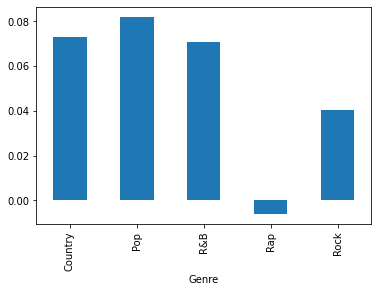

In [9]:
#Grouping Sentiment by Genre
data.groupby(['Genre']).mean()['Polarity'].plot(kind = 'bar')


In [10]:
#test balance of target variable, does not appear to be too imbalanced
#due to small dataset size, we should not sample
data.pos_neg.value_counts()

1    261
0    157
Name: pos_neg, dtype: int64

In [11]:
X_Data = data['Lyrics']
y_Data = data['pos_neg']

In [12]:
#Import required Models and vectorizers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_Data, y_Data, test_size=0.33, random_state=4)

In [19]:
from pandas.core.common import random_state
clf = LogisticRegression(random_state=4, solver='newton-cg',C=1e40)
nvb = MultinomialNB()
cv = CountVectorizer()

In [20]:
X_train_dtm = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)
clf.fit(X_train_dtm, y_train)
nvb.fit(X_train_dtm, y_train)

MultinomialNB()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Logistic Regression
Area Under Curve: 0.679
Accuracy: 0.645
F1 Score: 0.713


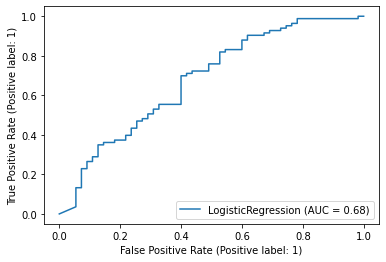

In [21]:
auc = metrics.roc_auc_score(y_test, clf.predict_proba(X_test_dtm)[:,1])
acc = metrics.accuracy_score(y_test, clf.predict(X_test_dtm))
f1 = metrics.f1_score(y_test, clf.predict(X_test_dtm))
metrics.plot_roc_curve(clf,X_test_dtm, y_test)
print('Logistic Regression')
print('Area Under Curve:', round(auc,3))
print('Accuracy:', round(acc,3))
print('F1 Score:', round(f1,3))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Naive Bayes
Area Under Curve: 0.675
Accuracy: 0.703
F1 Score: 0.783


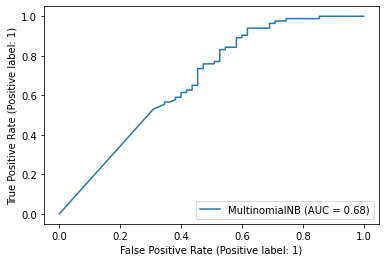

In [22]:
auc = metrics.roc_auc_score(y_test, nvb.predict_proba(X_test_dtm)[:,1])
acc = metrics.accuracy_score(y_test, nvb.predict(X_test_dtm))
f1 = metrics.f1_score(y_test, nvb.predict(X_test_dtm))
metrics.plot_roc_curve(nvb,X_test_dtm, y_test)
print('Naive Bayes')
print('Area Under Curve:', round(auc,3))
print('Accuracy:', round(acc,3))
print('F1 Score:', round(f1,3))